In [97]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids

In [98]:
def persistence_of_clusters(before,after):
    
    
    
    cluster_persistence=[]
    for cluster in range(0,14):
        
        cluster=before.loc[before['label']==cluster]
        int_tick_of_cluster=cluster.int_tick
    
        int_tick_next_day=[]
        for ticket in int_tick_of_cluster:
            
            int_tick_next_day.append(after.loc[after['int_tick']==ticket])
            
        
        int_tick_next_day=pd.concat(int_tick_next_day)                           
        max_=max((int_tick_next_day.label).value_counts())
        cluster_persistence.append((max_/len(cluster)*100))
        
    return cluster_persistence

In [99]:
def Results(final_dist,periods,int_tick_names):
    
    # normalize the distance matrix
    Normalized_final=[]
    for matrix in final_dist:
        matrix=np.array(matrix)
        matrix=matrix/matrix.max()
        matrix=pd.DataFrame(matrix)
        Normalized_final.append(matrix)
        
    sill=[]
    for dist_mat in Normalized_final:
        kmedoids = KMedoids(15,metric='precomputed',init='k-medoids++',random_state=0).fit(dist_mat) #clustering
        labels=kmedoids.labels_
        sill.append(silhouette_score(X=dist_mat,labels=labels,metric='precomputed'))
    
    days=range(10,len(periods))
    plt.figure(figsize=(17,4))
    plt.rcParams['axes.facecolor'] = 'whitesmoke'
    plt.plot(days,sill,'darkslateblue')
    #plt.xticks(days)
    plt.title('time series silhouette')
    plt.xlabel("periods")
    plt.ylabel("Silhouette score")
    plt.grid(True)
    plt.show()

    persistence_time_series=[]
    
    #print(Normalized_final[0])

    for Nday in range(0,len(periods)-11):
    
        if Nday!=len(periods)-11:
        
            # current day data:         
            current_clustering=KMedoids(15,metric='precomputed',init='k-medoids++',random_state=0).fit(Normalized_final[Nday]) #clustering
            labels_current=pd.Series(current_clustering.labels_)
            labels_current.name='label'                       
            Data_before=pd.concat([int_tick_names,labels_current],axis=1)
            
            
            # current day next:
            next_clustering=KMedoids(15,metric='precomputed',init='k-medoids++',random_state=0).fit(Normalized_final[Nday+1]) #clustering
            labels_next=pd.Series(next_clustering.labels_)
            labels_next.name='label'
            Data_next=pd.concat([int_tick_names,labels_next],axis=1)
            
            

            persictence=persistence_of_clusters(Data_before,Data_next)

            persistence_time_series.append(sum(persictence)/15)
            
    days=range(10,len(periods)-1)
    plt.figure(figsize=(17,4))
    plt.rcParams['axes.facecolor'] = 'whitesmoke'
    plt.plot(days,persistence_time_series,'darkslateblue')
    #plt.xticks(days)
    plt.title('time series persistence')
    plt.xlabel("periods")
    plt.ylabel("average persistence")
    plt.grid(True)
    plt.show()
    
    return sill , persistence_time_series

In [100]:
# import the data
Data=pd.read_csv('preproccesed.csv')
Data=Data.drop('Unnamed: 0',axis=1)


periods=list((Data.loc[Data['int_tick']==Data.int_tick[0]]).prd)
int_tick_names=(Data.loc[Data['prd']==periods[0]]).int_tick
int_tick_names=int_tick_names.reset_index(drop=True)

In [101]:
sill_l=[] 
prst_l=[]

In [102]:
directory_dist="C:\\Users\\thela\\Desktop\\Εργασια ΙΠΤΗΛ\\Distance Matricies\\"
directory_corr="C:\\Users\\thela\\Desktop\\Εργασια ΙΠΤΗΛ\\corr_rind\\rind_sret\\"

# Expirement spr-rat-rint(sret)

In [103]:
features=['spr','rat']
weight=0.3
corr_name='rint-sret'

# take the distance matricies
feat_c=[]
for feat in features:
    
    feature=[]
    for prd in periods:
        dist_matrix=pd.read_csv(directory_dist+feat+' '+str(prd)+'.csv')
        dist_matrix=dist_matrix.iloc[:,1:len(dist_matrix)+1]
        feature.append(dist_matrix)
        
        
    feat_c.append(feature)

Wfeatures=[]
for day in range(0,len(periods)):
    Wfeatures.append((feat_c[0][day]*weight).values+(feat_c[1][day]*weight).values)
    
WDfeatures=[]
for dist in Wfeatures:
    WDfeatures.append(pd.DataFrame(dist))
    
# load distance matricies
periods_new=periods[10:len(periods)]

corr_type=[]
for prd in periods_new:
    corr=pd.read_csv(directory_corr+str(prd)+' '+corr_name+'.csv')
    corr=corr.iloc[:,1:len(dist_matrix)+1]
    corr_type.append(corr)
    
fill=[0,0,0,0,0,0,0,0,0,0]
new_corr=fill+corr_type

final_dist=[]
for day in range(0,len(periods)):
    final_dist.append(WDfeatures[day].values+new_corr[day]*weight)
    
final_dist=final_dist[10:len(periods)]

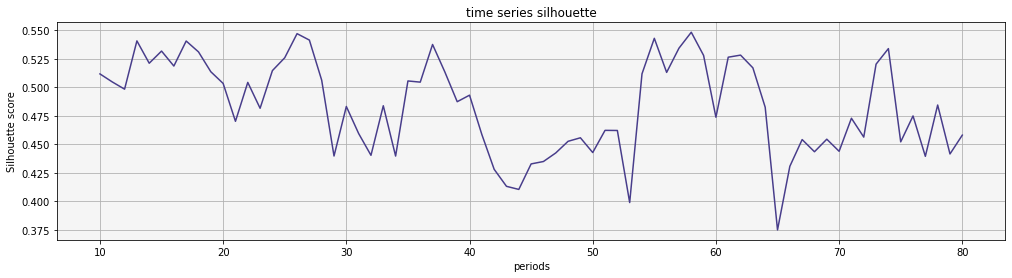

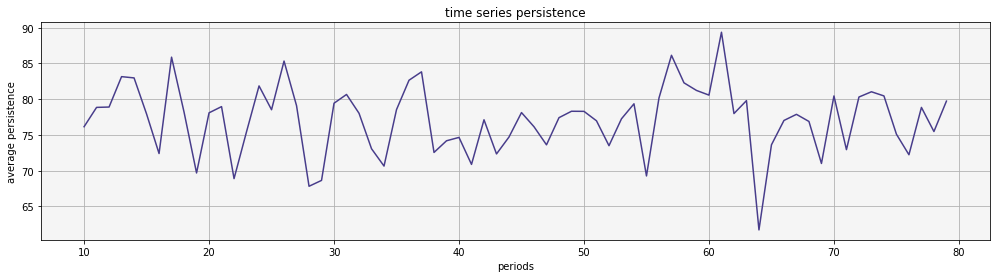

In [104]:
sillt , perst = Results(final_dist,periods,int_tick_names)
sill_l.append(sum(sillt)/len(sillt))
prst_l.append(sum(perst)/len(perst))

# spr-rat-len-size-rint(sret)

In [105]:
features=['spr','rat','lev','size']
weight=0.2
corr_name='rint-sret'

# take the distance matricies
feat_c=[]
for feat in features:
    
    feature=[]
    for prd in periods:
        dist_matrix=pd.read_csv(directory_dist+feat+' '+str(prd)+'.csv')
        dist_matrix=dist_matrix.iloc[:,1:len(dist_matrix)+1]
        feature.append(dist_matrix)
        
        
    feat_c.append(feature)

Wfeatures=[]
for day in range(0,len(periods)):
    Wfeatures.append((feat_c[0][day]*weight).values+(feat_c[1][day]*weight).values+(feat_c[2][day]*weight).values+(feat_c[3][day]*weight).values)
    
WDfeatures=[]
for dist in Wfeatures:
    WDfeatures.append(pd.DataFrame(dist))
    
# load distance matricies
periods_new=periods[10:len(periods)]

corr_type=[]
for prd in periods_new:
    corr=pd.read_csv(directory_corr+str(prd)+' '+corr_name+'.csv')
    corr=corr.iloc[:,1:len(dist_matrix)+1]
    corr_type.append(corr)
    
fill=[0,0,0,0,0,0,0,0,0,0]
new_corr=fill+corr_type

final_dist=[]
for day in range(0,len(periods)):
    final_dist.append(WDfeatures[day].values+new_corr[day]*weight)
    
final_dist=final_dist[10:len(periods)]

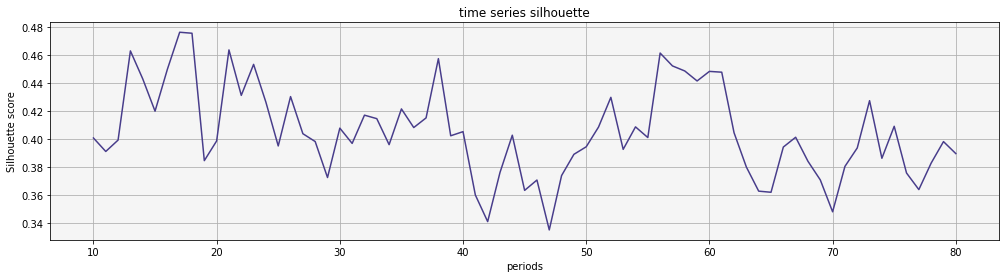

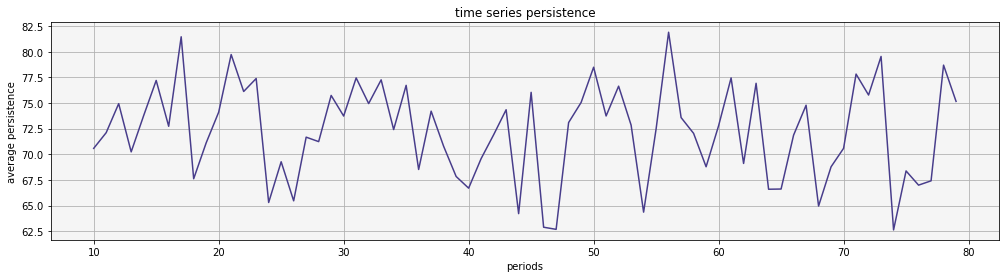

In [106]:
sillt , perst = Results(final_dist,periods,int_tick_names)
sill_l.append(sum(sillt)/len(sillt))
prst_l.append(sum(perst)/len(perst))

# spr-rat-len-size-beta-rint(sret)

In [107]:
features=['spr','rat','lev','size','beta']
weight=0.16
corr_name='rint-sret'

# take the distance matricies
feat_c=[]
for feat in features:
    
    feature=[]
    for prd in periods:
        dist_matrix=pd.read_csv(directory_dist+feat+' '+str(prd)+'.csv')
        dist_matrix=dist_matrix.iloc[:,1:len(dist_matrix)+1]
        feature.append(dist_matrix)
        
        
    feat_c.append(feature)

Wfeatures=[]
for day in range(0,len(periods)):
     Wfeatures.append((feat_c[0][day]*weight).values+(feat_c[1][day]*weight).values+(feat_c[2][day]*weight).values+(feat_c[3][day]*weight).values+(feat_c[4][day]*weight).values)
    
WDfeatures=[]
for dist in Wfeatures:
    WDfeatures.append(pd.DataFrame(dist))
    
# load distance matricies
periods_new=periods[10:len(periods)]

corr_type=[]
for prd in periods_new:
    corr=pd.read_csv(directory_corr+str(prd)+' '+corr_name+'.csv')
    corr=corr.iloc[:,1:len(dist_matrix)+1]
    corr_type.append(corr)
    
fill=[0,0,0,0,0,0,0,0,0,0]
new_corr=fill+corr_type

final_dist=[]
for day in range(0,len(periods)):
    final_dist.append(WDfeatures[day].values+new_corr[day]*weight)
    
final_dist=final_dist[10:len(periods)]

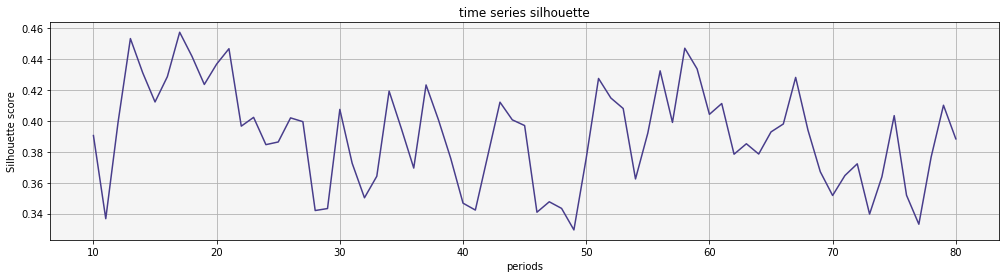

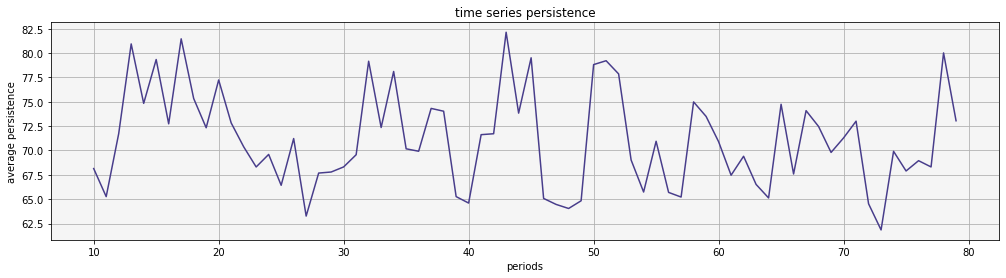

In [108]:
sillt , perst = Results(final_dist,periods,int_tick_names)
sill_l.append(sum(sillt)/len(sillt))
prst_l.append(sum(perst)/len(perst))

# spr-rat-len-size-beta-iret-sov-rint(sret)

In [109]:
features=['spr','rat','lev','size','beta','iret','sov']
weight=0.125
corr_name='rint-sret'

# take the distance matricies
feat_c=[]
for feat in features:
    
    feature=[]
    for prd in periods:
        dist_matrix=pd.read_csv(directory_dist+feat+' '+str(prd)+'.csv')
        dist_matrix=dist_matrix.iloc[:,1:len(dist_matrix)+1]
        feature.append(dist_matrix)
        
        
    feat_c.append(feature)

Wfeatures=[]
for day in range(0,len(periods)):
     Wfeatures.append((feat_c[0][day]*weight).values+(feat_c[1][day]*weight).values+(feat_c[2][day]*weight).values+(feat_c[3][day]*weight).values+(feat_c[4][day]*weight).values+(feat_c[5][day]*weight).values+(feat_c[6][day]*weight).values)
    
WDfeatures=[]
for dist in Wfeatures:
    WDfeatures.append(pd.DataFrame(dist))
    
# load distance matricies
periods_new=periods[10:len(periods)]

corr_type=[]
for prd in periods_new:
    corr=pd.read_csv(directory_corr+str(prd)+' '+corr_name+'.csv')
    corr=corr.iloc[:,1:len(dist_matrix)+1]
    corr_type.append(corr)
    
fill=[0,0,0,0,0,0,0,0,0,0]
new_corr=fill+corr_type

final_dist=[]
for day in range(0,len(periods)):
    final_dist.append(WDfeatures[day].values+new_corr[day]*weight)
    
final_dist=final_dist[10:len(periods)]

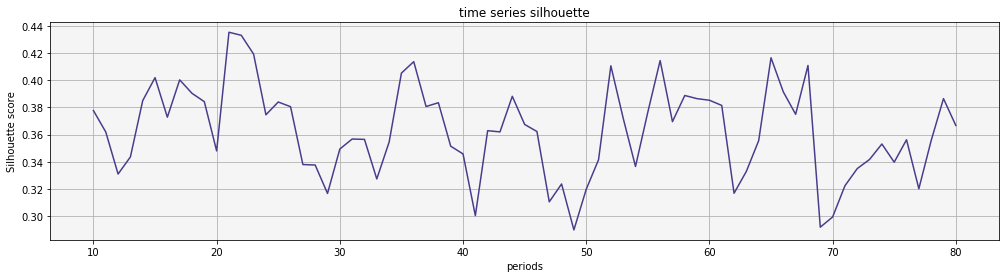

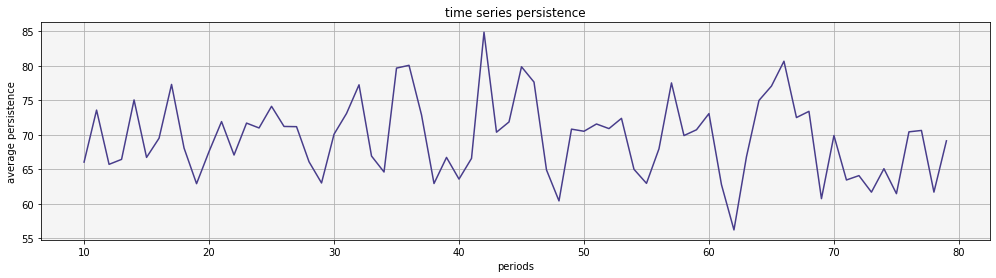

In [110]:
sillt , perst = Results(final_dist,periods,int_tick_names)
sill_l.append(sum(sillt)/len(sillt))
prst_l.append(sum(perst)/len(perst))

In [111]:
avg_siil=pd.Series(sill_l,name='average_silhouette')
avg_prst_l=pd.Series(prst_l,name='average_persistence')

Summary_table=pd.concat([avg_siil,avg_prst_l],axis=1)

In [112]:
Summary_table

,average_silhouette,average_persistence
0,0.483450,77.152872
1,0.405477,72.222236
2,0.390373,71.112382
3,0.362734,69.506326


In [113]:
variables=['corr_rint_sret_exp1','corr_rint_sret_exp2','corr_rint_sret_exp3','corr_rint_sret_exp4']

In [114]:
Summary_table.index=variables

In [115]:
Summary_table

,average_silhouette,average_persistence
corr_rint_sret_exp1,0.483450,77.152872
corr_rint_sret_exp2,0.405477,72.222236
corr_rint_sret_exp3,0.390373,71.112382
corr_rint_sret_exp4,0.362734,69.506326


In [116]:
Summary_table.to_excel("rint-sret.xlsx")  

In [ ]:
#### this is only for change ###

In [ ]:
### This is my secont ###